In [19]:
!pip install ucimlrepo

In [20]:
import numpy as np
import pandas as pd

In [21]:
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [22]:
df= pd.DataFrame(X)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [23]:
print(df.isnull().sum())

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64


In [24]:
df['job'].fillna("unknown",inplace=True)
df['education'].fillna("unknown",inplace=True)
df['contact'].bfill(inplace=True)
df['poutcome'].fillna("default",inplace=True)
df['default'].fillna("unknown",inplace=True)
df['housing'].fillna("unknown",inplace=True)
df['loan'].fillna("unknown",inplace=True)
print(df.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['job']=le.fit_transform(df["job"])
df['marital']=le.fit_transform(df["marital"])
df['education']=le.fit_transform(df["education"])
df["contact"]=le.fit_transform(df["contact"])
df["poutcome"]=le.fit_transform(df["poutcome"])
df["default"]=le.fit_transform(df["default"])
df["housing"]=le.fit_transform(df["housing"])
df["loan"]=le.fit_transform(df["loan"])
y=le.fit_transform(y)

In [26]:
df.drop(["month","day_of_week"],axis= 1,inplace=True)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =  train_test_split(df,y,test_size=0.33)
sc= StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [29]:
sq = Sequential()

In [30]:
sq.add(layer = Dense(14,activation = "relu"))
sq.add(layer = Dense(32,activation = "relu"))
sq.add(layer = Dense(144,activation = "relu"))
sq.add(layer = Dense(1,activation = "sigmoid"))

In [31]:
sq.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model = sq.fit(xtrain,ytrain,validation_split=.33,epochs=20)

Epoch 1/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8759 - loss: 0.3361 - val_accuracy: 0.8951 - val_loss: 0.2638
Epoch 2/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8953 - loss: 0.2491 - val_accuracy: 0.8953 - val_loss: 0.2566
Epoch 3/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8973 - loss: 0.2417 - val_accuracy: 0.8977 - val_loss: 0.2562
Epoch 4/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8994 - loss: 0.2404 - val_accuracy: 0.8970 - val_loss: 0.2498
Epoch 5/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8972 - loss: 0.2442 - val_accuracy: 0.8943 - val_loss: 0.2544
Epoch 6/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8956 - loss: 0.2410 - val_accuracy: 0.8964 - val_loss: 0.2507
Epoch 7/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8993 - loss: 0.2347 - val_accuracy: 0.8965 - val_loss: 0.2496
Epoch 8/20
635/635 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9010 - loss: 0.2295 - val_accuracy: 

In [33]:
from sklearn.metrics import accuracy_score
ypred = sq.predict(xtest)
ypred = np.where(ypred>0.5,1,0)
accuracy_score(ytest,ypred)

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9

In [34]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

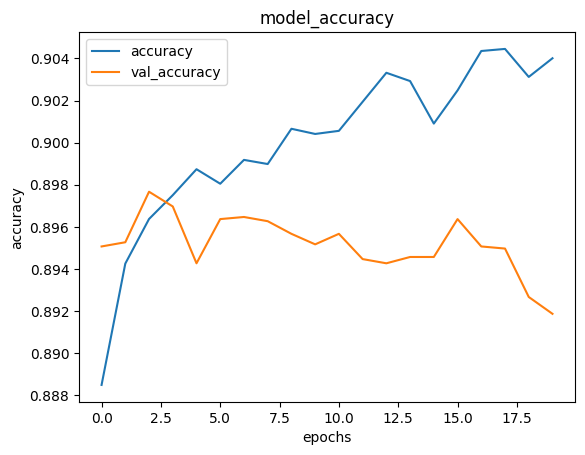

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title("model_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

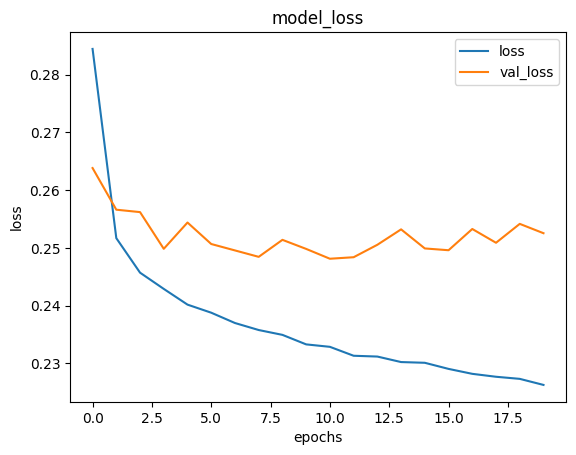

In [36]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title("model_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()